In [213]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [214]:
#Geometry
L1 = 1310.0 #Length of upstream bridge [m]
L2 = 1310.0 #Length of downstream bridge [m]

B = 18.3 #Width of bridge [m]
D = 3.33 #Height of bridge [m]

N = 1 #N*D = distance between bridges [m]
d = D*N #Distance between bridges [m]

In [215]:
#Wind parameters
rho = 1.25 #Density of air [kg/m^3]
V = 37.6 #10-minute mean wind velocity [m/s]
xL_u = 360 #Longitudinal turbulence length scale [m]
ctt = 1.2 #Turbulence factor
z = 50.0 #Location of the bridge above terrain [m]
z0 = 0.01 #Roughness length [m]
I_u = ctt / np.log(z/z0) #Longitudinal turbulence intensity
I_w = 0.5 * I_u #Vertical turbulence intensity
sigma_u = I_u * V #Longitudinal turbulence standard deviation
sigma_w = I_w * V #Vertical turbulence standard deviation

In [216]:
#Frequency
omega = np.linspace(0.001,3,1000) #Fine frequency axis [Hz]
omega_load = np.logspace(-3,1,100) #Crude frequency axis [Hz]

In [217]:
#Power spectra
a_u = 6.8 #Longitudinal turbulence spectrum coefficient
a_w = 0.55 #Vertical turbulence spectrum coefficient
omega_hat = omega_load * xL_u / V #Non-dimensional frequency
S_u = sigma_u**2 / omega_load * a_u * omega_hat / (1 + 1.5 *a_u * omega_hat)**(5/3) #Longitudinal turbulence spectrum
S_w = sigma_w**2 / omega_load * a_w * omega_hat / (1 + 1.5 *a_w * omega_hat)**(5/3) #Vertical turbulence spectrum

In [218]:
#Power co-spectra
b_u = 1.0 #Longitudinal turbulence co-spectrum coefficient
b_w = 0.5 #Vertical turbulence co-spectrum coefficient
c_u = 1.5 #Longitudinal turbulence co-spectrum coefficient
c_w = 1.0 #Vertical turbulence co-spectrum coefficient

kappa_u = b_u * np.sqrt((2*np.pi*omega_load/V)**2 + (1/(c_u*xL_u))**2)
kappa_w = b_w * np.sqrt((2*np.pi*omega_load/V)**2 + (1/(c_w*xL_u))**2) #Non-dimensional frequency

In [219]:
#Static coefficients
names = [
    # CD
    'CD_Upwind_1D', 'CD_Downwind_1D',
    'CD_Upwind_2D', 'CD_Downwind_2D',
    'CD_Upwind_3D', 'CD_Downwind_3D',
    'CD_Upwind_4D', 'CD_Downwind_4D',
    'CD_Upwind_5D', 'CD_Downwind_5D',
    'CD_Single',
    
    # CM
    'CM_Upwind_1D', 'CM_Downwind_1D',
    'CM_Upwind_2D', 'CM_Downwind_2D',
    'CM_Upwind_3D', 'CM_Downwind_3D',
    'CM_Upwind_4D', 'CM_Downwind_4D',
    'CM_Upwind_5D', 'CM_Downwind_5D',
    'CM_Single',
    
    # CL
    'CL_Upwind_1D', 'CL_Downwind_1D',
    'CL_Upwind_2D', 'CL_Downwind_2D',
    'CL_Upwind_3D', 'CL_Downwind_3D',
    'CL_Upwind_4D', 'CL_Downwind_4D',
    'CL_Upwind_5D', 'CL_Downwind_5D',
    'CL_Single'
]

save_dir = 'Static_coeff_for_buffeting'

for name in names:
    file_path = os.path.join(save_dir, name + '.npy')
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        globals()[name] = data

In [220]:
Bq_1D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_1D[0], CL_Upwind_1D[1] + CL_Upwind_1D[2] + (D/B)*CD_Upwind_1D[0]],
    [2*B*CM_Upwind_1D[0], B*CM_Upwind_1D[1] + B*CM_Upwind_1D[2]],
    [2*CL_Downwind_1D[0], CL_Downwind_1D[1] + CL_Downwind_1D[2] + (D/B)*CD_Downwind_1D[0]],
    [2*B*CM_Downwind_1D[0], B*CM_Downwind_1D[1] + B*CM_Downwind_1D[2]]
])

Bq_2D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_2D[0], CL_Upwind_2D[1] + CL_Upwind_2D[2] + (D/B)*CD_Upwind_2D[0]],
    [2*B*CM_Upwind_2D[0], B*CM_Upwind_2D[1] + B*CM_Upwind_2D[2]],
    [2*CL_Downwind_2D[0], CL_Downwind_2D[1] + CL_Downwind_2D[2] + (D/B)*CD_Downwind_2D[0]],
    [2*B*CM_Downwind_2D[0], B*CM_Downwind_2D[1] + B*CM_Downwind_2D[2]]
])

Bq_3D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_3D[0], CL_Upwind_3D[1] + CL_Upwind_3D[2] + (D/B)*CD_Upwind_3D[0]],
    [2*B*CM_Upwind_3D[0], B*CM_Upwind_3D[1] + B*CM_Upwind_3D[2]],
    [2*CL_Downwind_3D[0], CL_Downwind_3D[1] + CL_Downwind_3D[2] + (D/B)*CD_Downwind_3D[0]],
    [2*B*CM_Downwind_3D[0], B*CM_Downwind_3D[1] + B*CM_Downwind_3D[2]]
])

Bq_4D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_4D[0], CL_Upwind_4D[1] + CL_Upwind_4D[2] + (D/B)*CD_Upwind_4D[0]],
    [2*B*CM_Upwind_4D[0], B*CM_Upwind_4D[1] + B*CM_Upwind_4D[2]],
    [2*CL_Downwind_4D[0], CL_Downwind_4D[1] + CL_Downwind_4D[2] + (D/B)*CD_Downwind_4D[0]],
    [2*B*CM_Downwind_4D[0], B*CM_Downwind_4D[1] + B*CM_Downwind_4D[2]]
])

Bq_5D = (rho * V * B / 2) * np.array([
    [2*CL_Upwind_5D[0], CL_Upwind_5D[1] + CL_Upwind_5D[2] + (D/B)*CD_Upwind_5D[0]],
    [2*B*CM_Upwind_5D[0], B*CM_Upwind_5D[1] + B*CM_Upwind_5D[2]],
    [2*CL_Downwind_5D[0], CL_Downwind_5D[1] + CL_Downwind_5D[2] + (D/B)*CD_Downwind_5D[0]],
    [2*B*CM_Downwind_5D[0], B*CM_Downwind_5D[1] + B*CM_Downwind_5D[2]]
])

Bq_Single = (rho * V * B / 2) * np.array([
    [2*CL_Single[0], CL_Single[1] + (D/B)*CD_Single[0]],
    [2*B*CM_Single[0], B*CM_Single[1]]
])

In [221]:
#Mode shapes
data4 = np.load(r'C:\Users\alasm\Masteroppgave\HAR_INT\FEM\mode4_data.npz')
data15 = np.load(r'C:\Users\alasm\Masteroppgave\HAR_INT\FEM\mode15_data.npz')

x_4 = data4['x']
mode_4 = data4['mode']

x_15 = data15['x']
mode_15 = data15['mode']

#Number of nodes per bridge
nodes = len(x_4)
zero = np.zeros(nodes)

#Mode shapes for each dof along both bridges
phi_4a_z1 = np.hstack([mode_4[:, 2], zero])
phi_4a_theta1 = np.hstack([mode_4[:, 3], zero])
phi_4a_z2 = np.hstack([zero, zero])
phi_4a_theta2 = np.hstack([zero, zero])

phi_15a_z1 = np.hstack([mode_15[:, 2], zero])
phi_15a_theta1 = np.hstack([mode_15[:, 3], zero])
phi_15a_z2 = np.hstack([zero, zero])
phi_15a_theta2 = np.hstack([zero, zero])

phi_4b_z1 = np.hstack([zero, zero])
phi_4b_theta1 = np.hstack([zero, zero])
phi_4b_z2 = np.hstack([zero, mode_4[:, 2]])
phi_4b_theta2 = np.hstack([zero, mode_4[:, 3]])

phi_15b_z1 = np.hstack([zero, zero])
phi_15b_theta1 = np.hstack([zero, zero])
phi_15b_z2 = np.hstack([zero, mode_15[:, 2]])
phi_15b_theta2 = np.hstack([zero, mode_15[:, 3]])

#Mode shapes for each dof along one bridge
phi_4single_z1 = mode_4[:, 2]
phi_4single_theta1 = mode_4[:, 3]

phi_15single_z1 = mode_15[:, 2]
phi_15single_theta1 = mode_15[:, 3]

#Mode shapes for all dofs along both bridges
phi_4a = np.hstack([phi_4a_z1, phi_4a_theta1, phi_4a_z2, phi_4a_theta2])
phi_15a = np.hstack([phi_15a_z1, phi_15a_theta1, phi_15a_z2, phi_15a_theta2])
phi_4b = np.hstack([phi_4b_z1, phi_4b_theta1, phi_4b_z2, phi_4b_theta2])
phi_15b = np.hstack([phi_15b_z1, phi_15b_theta1, phi_15b_z2, phi_15b_theta2])

#Mode shape matrix for all modes
phi = np.column_stack((phi_4a, phi_15a, phi_4b, phi_15b))

#Mode shapes for all dofs along one bridge
phi_4single = np.hstack([phi_4single_z1, phi_4single_theta1])
phi_15single = np.hstack([phi_15single_z1, phi_15single_theta1])

#Mode shape matrix for all modes along one bridge
phi_single = np.column_stack((phi_4single, phi_15single))

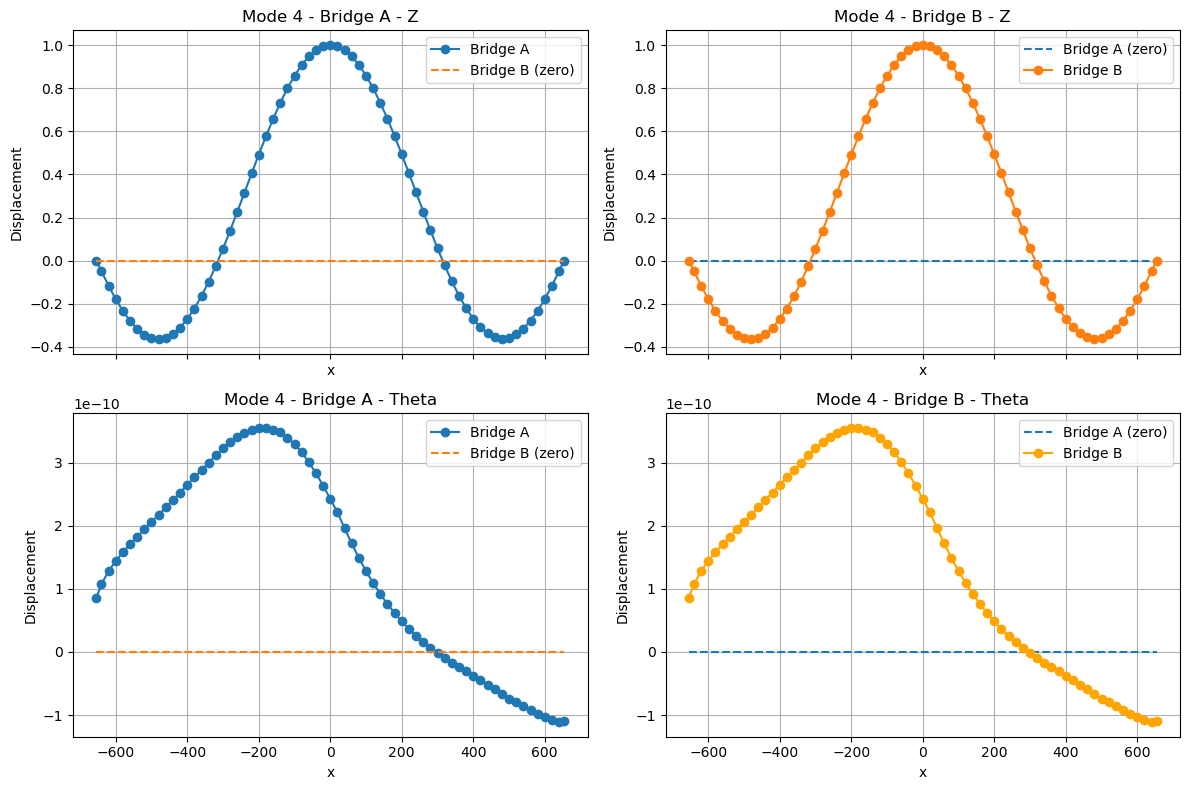

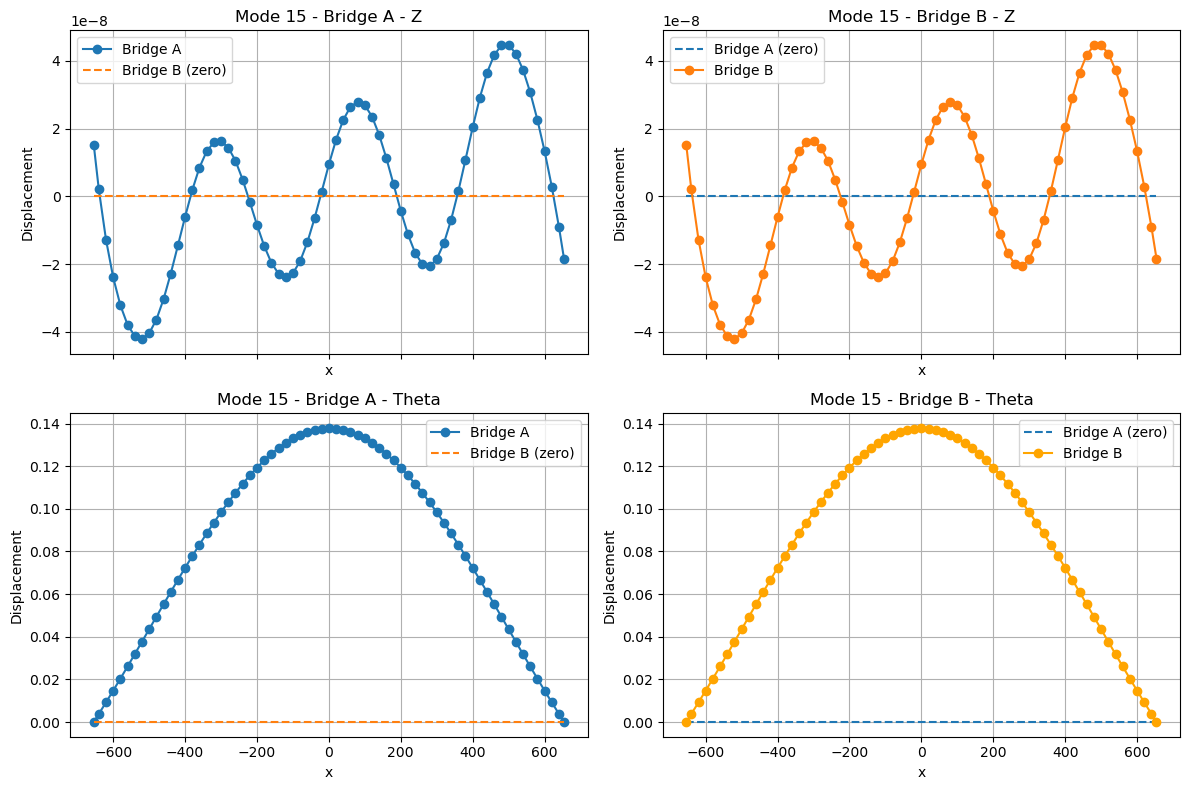

In [222]:
#Plotting of mode shapes
x_total = np.hstack([x_4])
nodes = len(x_4)
zero = np.zeros(nodes)

def plot_mode_set(x, za, ta, zb, tb, mode_title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

    # Bridge A - Z
    axs[0, 0].plot(x, za, marker='o', label="Bridge A")
    axs[0, 0].plot(x, np.hstack([zero]), '--', label="Bridge B (zero)")
    axs[0, 0].set_title(mode_title + " - Bridge A - Z")
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Bridge A - Theta
    axs[1, 0].plot(x, ta, marker='o', label="Bridge A")
    axs[1, 0].plot(x, np.hstack([zero]), '--', label="Bridge B (zero)")
    axs[1, 0].set_title(mode_title + " - Bridge A - Theta")
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Bridge B - Z
    axs[0, 1].plot(x, np.hstack([zero]), '--', label="Bridge A (zero)")
    axs[0, 1].plot(x, zb, marker='o', label="Bridge B")
    axs[0, 1].set_title(mode_title + " - Bridge B - Z")
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Bridge B - Theta
    axs[1, 1].plot(x, np.hstack([zero]), '--', label="Bridge A (zero)")
    axs[1, 1].plot(x, tb, marker='o', color='orange', label="Bridge B")
    axs[1, 1].set_title(mode_title + " - Bridge B - Theta")
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set_xlabel("x")
        ax.set_ylabel("Displacement")

    plt.tight_layout()
    plt.show()

# --- Prepare data for Mode 4 ---
phi_4a_z = np.hstack([mode_4[:, 2], zero])         # Bridge A active
phi_4a_theta = np.hstack([mode_4[:, 3], zero])

phi_4b_z = np.hstack([zero, mode_4[:, 2]])         # Bridge B active
phi_4b_theta = np.hstack([zero, mode_4[:, 3]])

plot_mode_set(x_total, phi_4a_z[:nodes], phi_4a_theta[:nodes], phi_4b_z[nodes:], phi_4b_theta[nodes:], "Mode 4")

# --- Prepare data for Mode 15 ---
phi_15a_z = np.hstack([mode_15[:, 2], zero])       # Bridge A active
phi_15a_theta = np.hstack([mode_15[:, 3], zero])

phi_15b_z = np.hstack([zero, mode_15[:, 2]])       # Bridge B active
phi_15b_theta = np.hstack([zero, mode_15[:, 3]])

plot_mode_set(x_total, phi_15a_z[:nodes], phi_15a_theta[:nodes], phi_15b_z[nodes:], phi_15b_theta[nodes:], "Mode 15")




In [223]:
coord_1 = np.zeros((nodes, 2))
coord_1[:, 0] = x_4
coord_1[:, 1] = np.ones(nodes) * (B/2 + D/2)

coord_2 = np.zeros((nodes, 2))
coord_2[:, 0] = x_4
coord_2[:, 1] = np.ones(nodes) * (-B/2 - D/2)

coord = np.vstack([coord_1, coord_2])

dxdx_ = np.abs(coord[:, np.newaxis, :] - coord[np.newaxis, :, :])

x = np.hstack([x_4, x_4, x_4, x_4, x_4, x_4, x_4, x_4])
x = x[:, None]
dxdx = np.abs(x - x.T)

x_single = np.hstack([x_4, x_4])
x_single = x_single[:, None]
dxdx_single = np.abs(x_single - x_single.T)

In [224]:
# Auto-spectral density of load

def SQ(Bq):
    SQ = np.zeros((4,4, omega.shape[0]))
    SQ_red = np.zeros((4,4, omega_load.shape[0]))
    for n in range(omega_load.shape[0]):
        Sww = S_w[n] * (1-0.5 * kappa_w[n] * dxdx) * np.exp(- kappa_w[n] * dxdx)
        Suu = S_u[n] * (1-0.5 * kappa_u[n] * dxdx) * np.exp(- kappa_u[n] * dxdx)
        for k in range(4):
            for l in range(4):
                phiphi = np.array([phi[:, k]]).T @ np.array([phi[:, l]])
                Int = Bq[k,1]*Bq[l,1] * Sww * phiphi + Bq[k,0]*Bq[l,0] * Suu * phiphi
                SQ_red[k,l,n] = np.trapz(np.trapz(Int, x[:,0]), x[:,0])
    for k in range(4):
        for l in range(4):
            SQ[k,l] = np.interp(omega, omega_load, SQ_red[k,l])
    return np.transpose(SQ, (2, 0, 1))

def SQ_single(Bq):
    SQ = np.zeros((2,2, omega.shape[0]))
    SQ_red = np.zeros((2,2, omega_load.shape[0]))
    for n in range(omega_load.shape[0]):
        Sww = S_w[n] * (1-0.5 * kappa_w[n] * dxdx_single) * np.exp(- kappa_w[n] * dxdx_single)
        Suu = S_u[n] * (1-0.5 * kappa_u[n] * dxdx_single) * np.exp(- kappa_u[n] * dxdx_single)
        for k in range(2):
            for l in range(2):
                phiphi = np.array([phi_single[:, k]]).T @ np.array([phi_single[:, l]])
                Int = Bq[k,1]*Bq[l,1] * Sww * phiphi + Bq[k,0]*Bq[l,0] * Suu * phiphi
                SQ_red[k,l,n] = np.trapz(np.trapz(Int, x_single[:,0]), x_single[:,0])
    for k in range(2):
        for l in range(2):
            SQ[k,l] = np.interp(omega, omega_load, SQ_red[k,l])
    return np.transpose(SQ, (2, 0, 1))

SQ_1D = SQ(Bq_1D)
SQ_2D = SQ(Bq_2D)
SQ_3D = SQ(Bq_3D)
SQ_4D = SQ(Bq_4D)
SQ_5D = SQ(Bq_5D)
SQ_Single = SQ_single(Bq_Single)


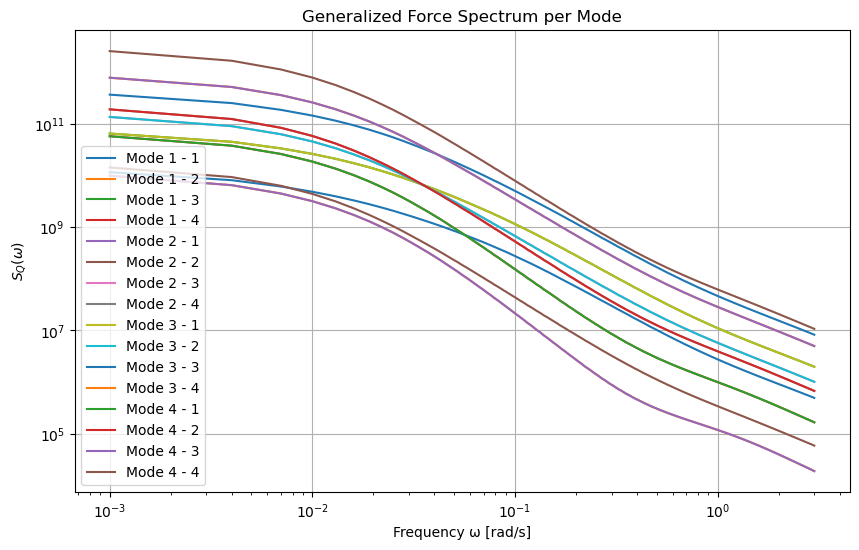

In [226]:
plt.figure(figsize=(10,6))

for k in range(4):
    for l in range(4):
        plt.plot(omega, SQ_1D[:,k,l], label=f"Mode {k+1} - {l+1}")

plt.xlabel("Frequency ω [rad/s]")
plt.ylabel("$S_Q(\omega)$")
plt.title("Generalized Force Spectrum per Mode")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


In [227]:
Cae_1D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_1D[1] + (D/B)*CD_Upwind_1D[0], 0, CL_Upwind_1D[2], 0],
    [B*CM_Upwind_1D[1], 0, B*CM_Upwind_1D[2], 0],
    [CL_Downwind_1D[1], 0 , CL_Downwind_1D[2] + (D/B)*CD_Downwind_1D[0], 0],
    [B*CM_Downwind_1D[1], 0 , B*CM_Downwind_1D[2], 0]
])

Cae_2D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_2D[1] + (D/B)*CD_Upwind_2D[0], 0, CL_Upwind_2D[2], 0],
    [B*CM_Upwind_2D[1], 0, B*CM_Upwind_2D[2], 0],
    [CL_Downwind_2D[1], 0 , CL_Downwind_2D[2] + (D/B)*CD_Downwind_2D[0], 0],
    [B*CM_Downwind_2D[1], 0 , B*CM_Downwind_2D[2], 0]
])

Cae_3D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_3D[1] + (D/B)*CD_Upwind_3D[0], 0, CL_Upwind_3D[2], 0],
    [B*CM_Upwind_3D[1], 0, B*CM_Upwind_3D[2], 0],
    [CL_Downwind_3D[1], 0 , CL_Downwind_3D[2] + (D/B)*CD_Downwind_3D[0], 0],
    [B*CM_Downwind_3D[1], 0 , B*CM_Downwind_3D[2], 0]
])

Cae_4D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_4D[1] + (D/B)*CD_Upwind_4D[0], 0, CL_Upwind_4D[2], 0],
    [B*CM_Upwind_4D[1], 0, B*CM_Upwind_4D[2], 0],
    [CL_Downwind_4D[1], 0 , CL_Downwind_4D[2] + (D/B)*CD_Downwind_4D[0], 0],
    [B*CM_Downwind_4D[1], 0 , B*CM_Downwind_4D[2], 0]
])

Cae_5D = (- rho * V * B / 2) * np.array([
    [CL_Upwind_5D[1] + (D/B)*CD_Upwind_5D[0], 0, CL_Upwind_5D[2], 0],
    [B*CM_Upwind_5D[1], 0, B*CM_Upwind_5D[2], 0],
    [CL_Downwind_5D[1], 0 , CL_Downwind_5D[2] + (D/B)*CD_Downwind_5D[0], 0],
    [B*CM_Downwind_5D[1], 0 , B*CM_Downwind_5D[2], 0]
])

Cae_Single = (- rho * V * B / 2) * np.array([
    [CL_Single[1] + (D/B)*CD_Single[0], 0],
    [B*CM_Single[1], 0]
])

In [228]:
Kae_1D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_1D[1], 0, CL_Upwind_1D[2]],
    [0, B*CM_Upwind_1D[1], 0, B*CM_Upwind_1D[2]],
    [0, CL_Downwind_1D[1], 0, CL_Downwind_1D[2]],
    [0, B*CM_Downwind_1D[1], 0, B*CM_Downwind_1D[2]]
])

Kae_2D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_2D[1], 0, CL_Upwind_2D[2]],
    [0, B*CM_Upwind_2D[1], 0, B*CM_Upwind_2D[2]],
    [0, CL_Downwind_2D[1], 0, CL_Downwind_2D[2]],
    [0, B*CM_Downwind_2D[1], 0, B*CM_Downwind_2D[2]]
])

Kae_3D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_3D[1], 0, CL_Upwind_3D[2]],
    [0, B*CM_Upwind_3D[1], 0, B*CM_Upwind_3D[2]],
    [0, CL_Downwind_3D[1], 0, CL_Downwind_3D[2]],
    [0, B*CM_Downwind_3D[1], 0, B*CM_Downwind_3D[2]]
])

Kae_4D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_4D[1], 0, CL_Upwind_4D[2]],
    [0, B*CM_Upwind_4D[1], 0, B*CM_Upwind_4D[2]],
    [0, CL_Downwind_4D[1], 0, CL_Downwind_4D[2]],
    [0, B*CM_Downwind_4D[1], 0, B*CM_Downwind_4D[2]]
])

Kae_5D = (rho * V**2 * B / 2) * np.array([
    [0, CL_Upwind_5D[1], 0, CL_Upwind_5D[2]],
    [0, B*CM_Upwind_5D[1], 0, B*CM_Upwind_5D[2]],
    [0, CL_Downwind_5D[1], 0, CL_Downwind_5D[2]],
    [0, B*CM_Downwind_5D[1], 0, B*CM_Downwind_5D[2]]
])

Kae_Single = (rho * V**2 * B / 2) * np.array([
    [0, CL_Single[1]],
    [0, B*CM_Single[1]]
])


In [229]:
#Modal masses
m4 = 4440740 #kg
m15 = 5628460 #kg

#Natural frequencies
f4 = 0.14066 #Hz
f15 = 0.35969 #Hz

#Modal damping ratios
zeta = 0.005 

#Modal mass matrix
mass = np.array([m4, m15, m4, m15])
M = np.diag(mass)
mass_single = np.array([m4, m15])
M_single = np.diag(mass_single)

#Modal stiffness matrix
stiffness = np.array([m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2, m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2])
K = np.diag(stiffness)
stiffness_single = np.array([m4 * (2 * np.pi * f4)**2, m15 * (2 * np.pi * f15)**2])
K_single = np.diag(stiffness_single)

#Modal damping matrix
C = 2 * zeta * np.sqrt(np.dot(M, K))
C_single = 2 * zeta * np.sqrt(np.dot(M_single, K_single))

In [230]:
#Generalizing the aerodynamic stiffness and damping matrices
dx_array = np.zeros_like(x_4)
dx_array[1:-1] = (x_4[2:] - x_4[:-2]) / 2
dx_array[0] = (x_4[1] - x_4[0]) / 2
dx_array[-1] = (x_4[-1] - x_4[-2]) / 2

dx4x4 = np.hstack([dx_array, dx_array, dx_array, dx_array, dx_array, dx_array, dx_array, dx_array])
dx2x2 = np.hstack([dx_array, dx_array])

Kae_1D_gen = np.zeros((4, 4))
Kae_2D_gen = np.zeros((4, 4))
Kae_3D_gen = np.zeros((4, 4))
Kae_4D_gen = np.zeros((4, 4))
Kae_5D_gen = np.zeros((4, 4))
Kae_Single_gen = np.zeros((2, 2))

Cae_1D_gen = np.zeros((4, 4))
Cae_2D_gen = np.zeros((4, 4))
Cae_3D_gen = np.zeros((4, 4))
Cae_4D_gen = np.zeros((4, 4))
Cae_5D_gen = np.zeros((4, 4))
Cae_Single_gen = np.zeros((2, 2))

for i in range(4):
    for j in range(4):
        integrand = phi[:, i] * phi[:, j] * dx4x4
        integral = np.sum(integrand)
        Kae_1D_gen[i, j] = np.trace(Kae_1D) * integral
        Kae_2D_gen[i, j] = np.trace(Kae_2D) * integral
        Kae_3D_gen[i, j] = np.trace(Kae_3D) * integral
        Kae_4D_gen[i, j] = np.trace(Kae_4D) * integral
        Kae_5D_gen[i, j] = np.trace(Kae_5D) * integral
        Cae_1D_gen[i, j] = np.trace(Cae_1D) * integral
        Cae_2D_gen[i, j] = np.trace(Cae_2D) * integral
        Cae_3D_gen[i, j] = np.trace(Cae_3D) * integral
        Cae_4D_gen[i, j] = np.trace(Cae_4D) * integral
        Cae_5D_gen[i, j] = np.trace(Cae_5D) * integral

for i in range(2):
    for j in range(2):
        integrand = phi_single[:, i] * phi_single[:, j] * dx2x2
        integral = np.sum(integrand)
        Kae_Single_gen[i, j] = np.trace(Kae_Single) * integral
        Cae_Single_gen[i, j] = np.trace(Cae_Single) * integral



In [231]:
# Create a dictionary of all matrices
matrices = {
    "Kae_1D": Kae_1D / V,
    "Kae_2D": Kae_2D /V,
    "Kae_3D": Kae_3D /V,
    "Kae_4D": Kae_4D /V,
    "Kae_5D": Kae_5D /V,
    "Kae_Single": Kae_Single /V,
    "Cae_1D": Cae_1D /V,
    "Cae_2D": Cae_2D /V,
    "Cae_3D": Cae_3D /V,
    "Cae_4D": Cae_4D /V,
    "Cae_5D": Cae_5D /V,
    "Cae_Single": Cae_Single /V
}

# Specify path
save_path = r'C:\Users\alasm\Masteroppgave\HAR_INT\Buffeting/Cae_Kae.npy'  # Change this path as needed

# Save the dictionary
np.save(save_path, matrices)

In [239]:
#Frequency response function
H_1D = []
H_2D = []
H_3D = []
H_4D = []
H_5D = []
H_Single = []

for w in omega:
    h_1D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_1D_gen) + (K - Kae_1D_gen))
    H_1D.append(h_1D)
    h_2D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_2D_gen) + (K - Kae_2D_gen))
    H_2D.append(h_2D)
    h_3D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_3D_gen) + (K - Kae_3D_gen))
    H_3D.append(h_3D)
    h_4D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_4D_gen) + (K - Kae_4D_gen))
    H_4D.append(h_4D)
    h_5D = np.linalg.inv(-w**2 * M + 1j * w * (C - Cae_5D_gen) + (K - Kae_5D_gen))
    H_5D.append(h_5D)
    h_single = np.linalg.inv(-w**2 * M_single + 1j * w * (C_single - Cae_Single_gen) + (K_single - Kae_Single_gen))
    H_Single.append(h_single)

H_1D = np.array(H_1D)
H_2D = np.array(H_2D)
H_3D = np.array(H_3D)
H_4D = np.array(H_4D)
H_5D = np.array(H_5D)
H_Single = np.array(H_Single)

H_1D_her = np.transpose(np.conjugate(H_1D), axes=(0, 2, 1))
H_2D_her = np.transpose(np.conjugate(H_2D), axes=(0, 2, 1))
H_3D_her = np.transpose(np.conjugate(H_3D), axes=(0, 2, 1))
H_4D_her = np.transpose(np.conjugate(H_4D), axes=(0, 2, 1))
H_5D_her = np.transpose(np.conjugate(H_5D), axes=(0, 2, 1))
H_Single_her = np.transpose(np.conjugate(H_Single), axes=(0, 2, 1))

In [240]:
#Response spectra
S_eta_1D = H_1D @ SQ_1D @ H_1D_her
S_eta_2D = H_2D @ SQ_2D @ H_2D_her
S_eta_3D = H_3D @ SQ_3D @ H_3D_her
S_eta_4D = H_4D @ SQ_4D @ H_4D_her
S_eta_5D = H_5D @ SQ_5D @ H_5D_her
S_eta_Single = H_Single @ SQ_Single @ H_Single_her

S_r_1D = phi @ S_eta_1D @ phi.T
S_r_2D = phi @ S_eta_2D @ phi.T
S_r_3D = phi @ S_eta_3D @ phi.T
S_r_4D = phi @ S_eta_4D @ phi.T
S_r_5D = phi @ S_eta_5D @ phi.T
S_r_Single = phi_single @ S_eta_Single @ phi_single.T

In [268]:
print(nodes)
diag = np.diagonal(S_r_1D, axis1=1, axis2=2)
diag_real = np.real(diag)
max_per_dof = np.max(diag_real, axis=0)

print(max_per_dof[70])
#print(max_per_dof)
print(max_per_dof.shape)

i1 = np.argmax(max_per_dof[0:67])
i2 = np.argmax(max_per_dof[135:202]) + 135
i3 = np.argmax(max_per_dof[335:402]) + 335
i4 = np.argmax(max_per_dof[470:535]) + 470

print(i1, i2, i3, i4)
print(max_per_dof[i1])
print(max_per_dof[i2])
print(max_per_dof[i3])
print(max_per_dof[i4])

67
0.0
(536,)
33 167 368 502
0.021748736128785345
6.081053149081225e-05
0.00095452302823128
3.35923648431778e-07


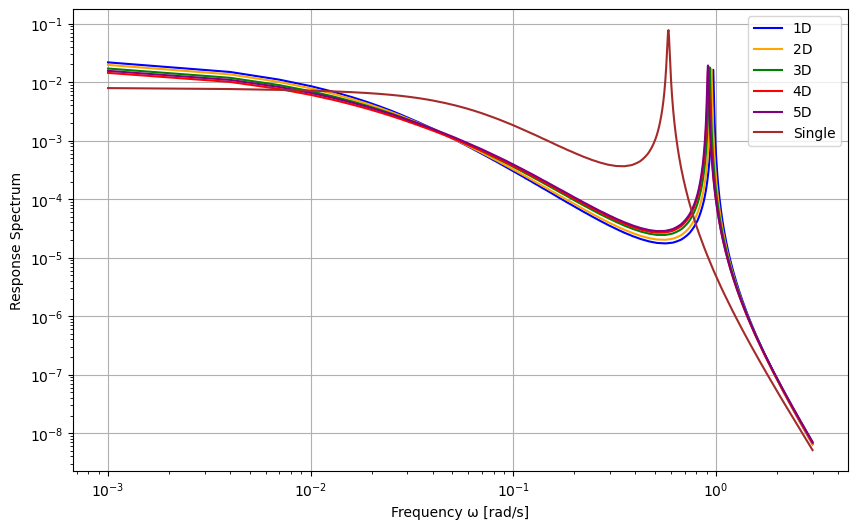

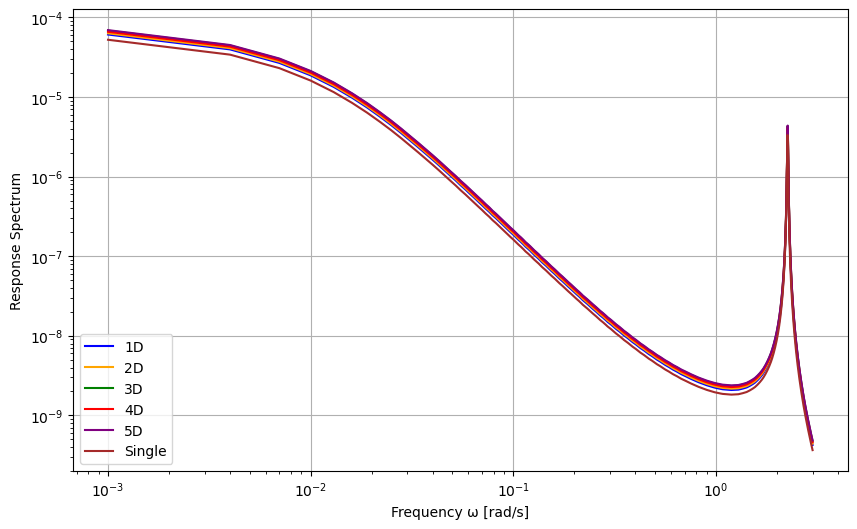

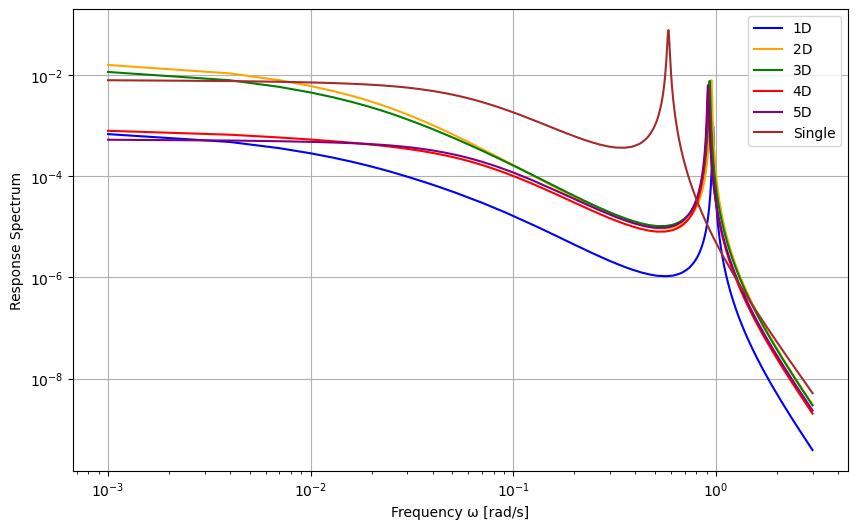

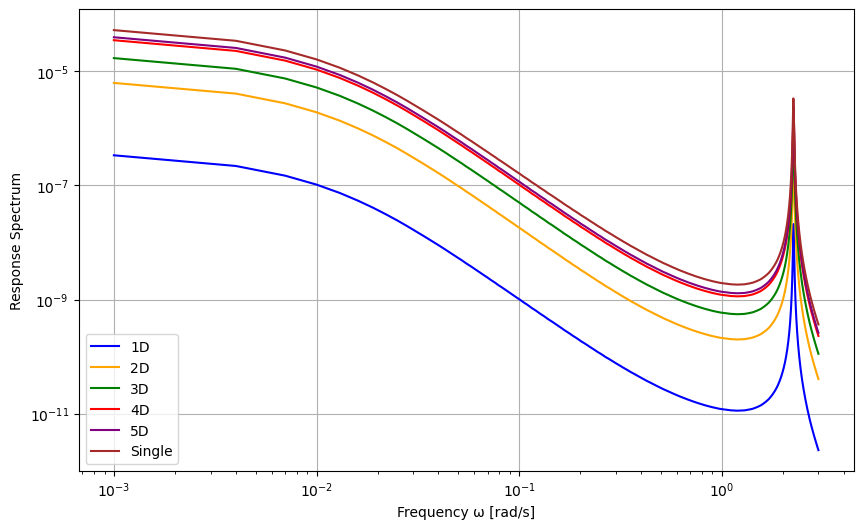

In [272]:

def plot_response_spectrum(node):
    plt.figure(figsize=(10, 6))
    plt.plot(omega, S_r_1D[:, node, node], label="1D", color='blue')
    plt.plot(omega, S_r_2D[:, node, node], label="2D", color='orange')
    plt.plot(omega, S_r_3D[:, node, node], label="3D", color='green')
    plt.plot(omega, S_r_4D[:, node, node], label="4D", color='red')
    plt.plot(omega, S_r_5D[:, node, node], label="5D", color='purple')
    if node == 33:
        plt.plot(omega, S_r_Single[:, node, node], label="Single", color='brown')
    elif node == 167:
        plt.plot(omega, S_r_Single[:, 33+67, 33+67], label="Single", color='brown')
    elif node == 368:
        plt.plot(omega, S_r_Single[:, 33, 33], label="Single", color='brown')
    elif node == 502:
        plt.plot(omega, S_r_Single[:, 33+67, 33+67], label="Single", color='brown')
    plt.xlabel("Frequency ω [rad/s]")
    plt.ylabel("Response Spectrum")
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

plot_response_spectrum(i1)
plot_response_spectrum(i2)
plot_response_spectrum(i3)
plot_response_spectrum(i4)